In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "cardio_train.csv"
data = pd.read_csv(file_path, delimiter=";")

In [3]:
data['age'] = (data['age']/365).astype(int)

In [4]:
X = data.drop(columns=['id','cardio'])
y = data['cardio']

In [5]:
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scalar = StandardScaler()
X[numerical_features] = scalar.fit_transform(X[numerical_features])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [7]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [9]:
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('gb', gb_model)], voting='soft')

In [10]:
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42))],
                 voting='soft')

In [11]:
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)
voting_preds = voting_model.predict(X_test)

In [12]:
print("Random Forest Metrics: ")
print(classification_report(y_test, rf_preds))
print("Gradient Boosting Metrics: ")
print(classification_report(y_test, gb_preds))
print("Voting Classifier Metrics: ")
print(classification_report(y_test, voting_preds))

Random Forest Metrics: 
              precision    recall  f1-score   support

           0       0.71      0.73      0.72     10543
           1       0.72      0.70      0.71     10457

    accuracy                           0.71     21000
   macro avg       0.71      0.71      0.71     21000
weighted avg       0.71      0.71      0.71     21000

Gradient Boosting Metrics: 
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10543
           1       0.76      0.69      0.72     10457

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000

Voting Classifier Metrics: 
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10543
           1       0.75      0.70      0.72     10457

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     

In [13]:
voting_cm = confusion_matrix(y_test, voting_preds)
print("Confusion Matrix for Voting Classifier: ")
print(voting_cm)

Confusion Matrix for Voting Classifier: 
[[8071 2472]
 [3169 7288]]


In [14]:
rf_acc = accuracy_score(y_test, rf_preds)
gb_acc = accuracy_score(y_test, gb_preds)
voting_acc = accuracy_score(y_test, voting_preds)

In [15]:
print(f"Random Forest Accuracy: {rf_acc:.2f}")
print(f"Gradient Boosting Accuracy: {gb_acc:.2f}")
print(f"Voting Classifier Accuracy: {voting_acc:.2f}")

Random Forest Accuracy: 0.71
Gradient Boosting Accuracy: 0.74
Voting Classifier Accuracy: 0.73


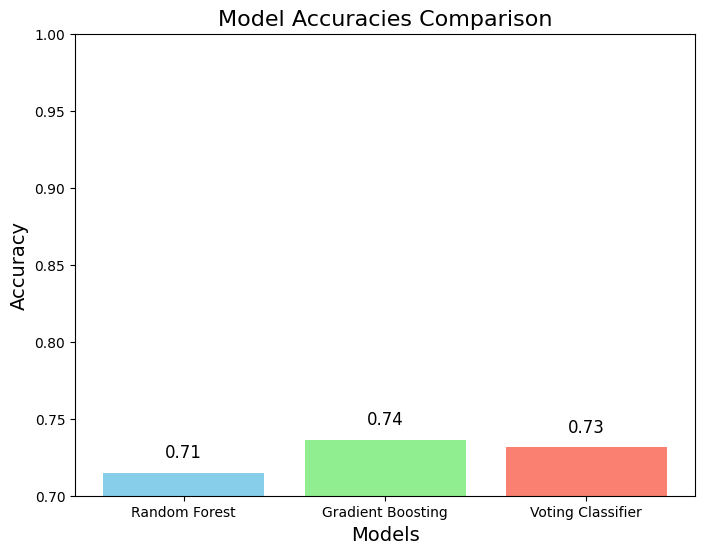

In [17]:
models = ['Random Forest', 'Gradient Boosting', 'Voting Classifier']
accuracies = [rf_acc, gb_acc, voting_acc]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracies Comparison', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.7, 1)
for i, acc in enumerate(accuracies):
    plt.text(i, acc+0.01, f'{acc:.2f}', ha='center', fontsize=12)
plt.show()

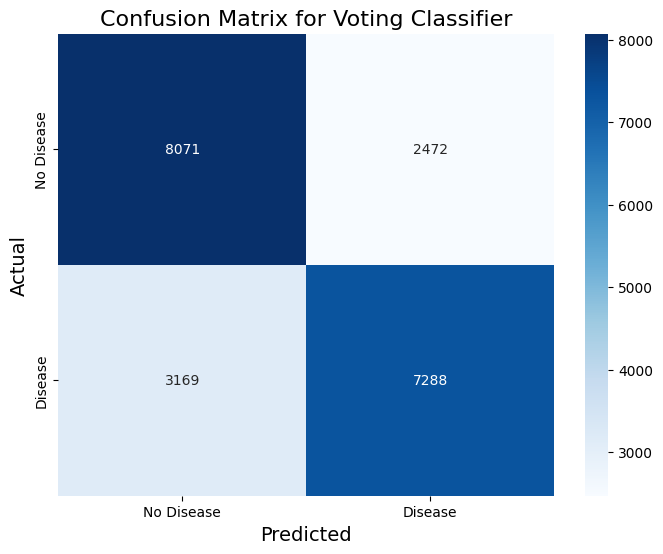

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(voting_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.title('Confusion Matrix for Voting Classifier', fontsize=16)
plt.show()